## Knearest Neighbors Classifier Algorithm

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
digits = load_digits()

# Shuffle the dataset
X, y = shuffle(digits.data, digits.target)

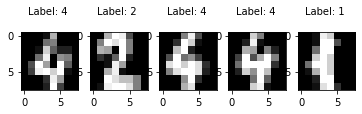

In [3]:
# making sure the labels and the images are matching after shuffling
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.reshape(X[i], (8, 8)), cmap='gray')
    plt.title('Label: %i \n' % y[i], fontsize = 10)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Split the training set into a training set and a dev set
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


Euclidean formula: $$\sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$  
where $x_i$ and $y_i$ are the features of the two data points. <br>

Manhattan formula: $$\sum_{i=1}^{n}|x_i - y_i|$$  
where $x_i$ and $y_i$ are the features of the two data points. <br>

Cosine formula: $$1 - \frac{\sum_{i=1}^{n}x_iy_i}{\sqrt{\sum_{i=1}^{n}x_i^2}\sqrt{\sum_{i=1}^{n}y_i^2}}$$  
where $x_i$ and $y_i$ are the features of the two data points. <br>

    

In [5]:
# Define the distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def cosine_distance(x1, x2):
    return 1 - (np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2)))

In [6]:
# Define the KNN classifier
class KNN:
    def __init__(self, k, distance_fn):
        self.k = k
        self.distance_fn = distance_fn

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # Initialize an empty list to store predictions
        y_pred = []
        for x in X:
             # Initialize an empty list to store distances of each point in the training set to the current point
            distances = []
            for i in range(len(self.X_train)):
                # Calculate the distance between the current point and the point in the training set
                distance = self.distance_fn(x, self.X_train[i])
                # Add the distance and corresponding label to the list of distances
                distances.append((distance, self.y_train[i]))
            # sort the list of distances based on the distance
            distances.sort()
            # get the k nearest neighbors by taking the first k elements of the sorted list
            k_neighbors = distances[:self.k]
            # get the labels of the k nearest neighbors
            k_neighbors_labels = [c for _, c in k_neighbors]
            # append the most common label among the k nearest neighbors as the prediction for the current point
            y_pred.append(np.argmax(np.bincount(k_neighbors_labels)))
        return y_pred

        

In [7]:
# finding the best k and distance function
best_k = 0
best_distance_fn = None
best_accuracy = 0

for k in range(1, 11):
    for distance_fn in [euclidean_distance, manhattan_distance, cosine_distance]:
        knn = KNN(k, distance_fn)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_dev)
        accuracy = accuracy_score(y_dev, y_pred)
        if accuracy > best_accuracy:
            best_k = k
            best_distance_fn = distance_fn
            best_accuracy = accuracy


In [8]:
# the best k and distance function
print(f"Best k: {best_k}")
print(f"Best distance function: {best_distance_fn.__name__}")

Best k: 1
Best distance function: euclidean_distance


In [9]:
# Test the model

# Initialize the KNN classifier with the best k and distance function
knn = KNN(best_k, best_distance_fn)
# Fit the model on the training set
knn.fit(X_train, y_train)
# Make predictions on the test set
y_pred = knn.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9888888888888889


The model performed well with an accuracy of 99% on the test data

## Visualize the Ground Truth

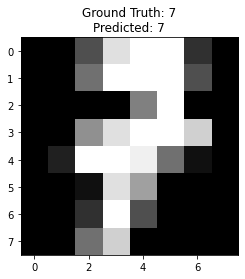

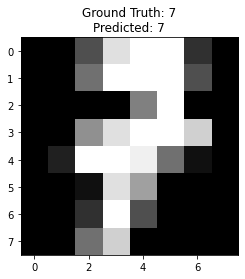

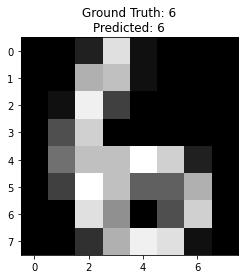

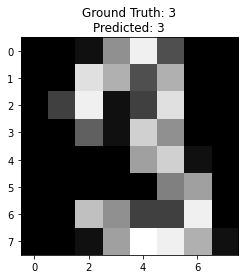

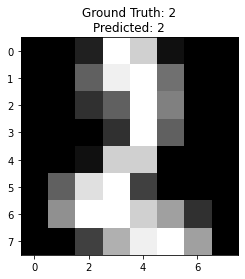

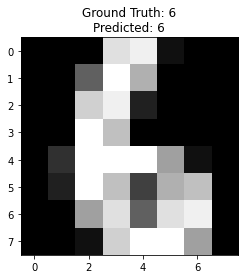

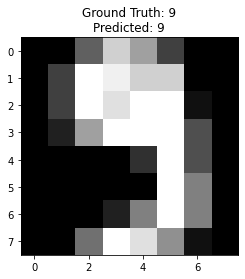

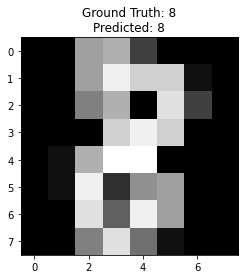

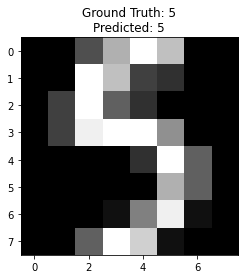

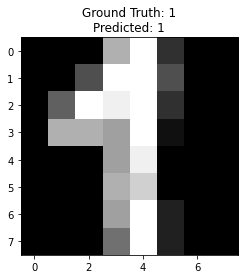

In [11]:
# Randomly select 10 samples from the test set
random_indices = np.random.randint(0, len(X_test), 10)
X_sample, y_sample = X_test[random_indices], y_test[random_indices]

# Predict the labels for the selected samples
y_pred = knn.predict(X_sample)

# Visualize the predictions
for i in range(len(X_sample)):
    plt.imshow(X_sample[i].reshape(8, 8), cmap='gray')
    plt.title("Ground Truth: {}\nPredicted: {}".format(y_sample[i], y_pred[i]))
    plt.savefig('image_{}.png'.format(i))
    plt.show()


The model was able to match the predicted values with the ground truth values 